## Prediction Using Supervised Machine Learning

#### We predicted the percentage of marks that a student is expected to score based upon the number of hours they studied                    This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Step 1 : Loading Data

In [4]:
data = pd.read_csv("student_study.csv")
print("Data imported successfully")

Data imported successfully


In [5]:
data.head()

,Unnamed: 0,Hours,Scores
0,1,2.5,21
1,2,5.1,47
2,3,3.2,27
3,4,8.5,75
4,5,3.5,30


In [11]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [12]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [13]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Step 2 - Descriptive Statistics

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   26 non-null     float64
 1   Scores  26 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 544.0 bytes


In [15]:
data.shape

(26, 2)

In [16]:
data.describe()

,Hours,Scores
count,26.000000,26.000000
mean,5.103846,51.461538
std,2.644766,26.295598
min,1.100000,17.000000
25%,2.825000,27.750000
50%,4.800000,44.500000
75%,7.700000,79.500000
max,9.200000,95.000000


In [17]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [18]:
data.nunique()

Hours     16
Scores    16
dtype: int64

In [19]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

- There are no missing values in the dataset.

## Step 3 - Visualizing the Data

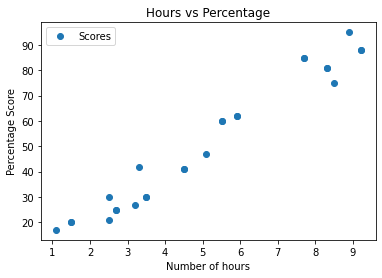

In [20]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Number of hours')  
plt.ylabel('Percentage Score')  
plt.show()

- Observation- Number of hours studied is linearly related to scores of the student

## Checking Outliers using boxplot

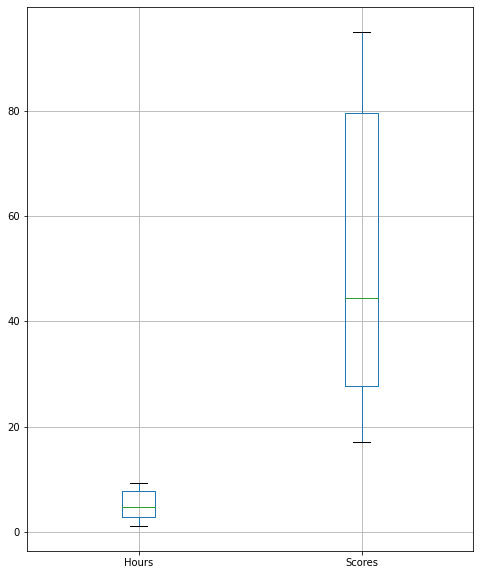

In [21]:
data.boxplot(figsize=(8,10))
plt.show()

- No outliers are present in the data

## Step 4 - Preparing the Data

In [23]:
# Split data into features and target
y = data['Scores']
x = data.drop('Scores',axis = 1)

## Step 5 - Model Building

In [24]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Splitting data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0) 

In [29]:
#Creating an instance of the LinearRegression
lr = LinearRegression()

#Creating the model
model = lr.fit(x_train,y_train)

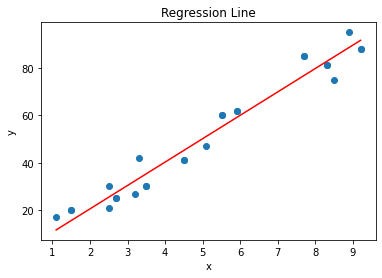

In [33]:
import matplotlib.pyplot as plt
import numpy as np

#defined the necessary variables: x, y, lr.coef_, and lr.intercept_

x = np.array(x, dtype=np.float64)  # Convert x to a numeric array

# Generate a sequence of x values for plotting the line
x_line = np.linspace(min(x), max(x), 100)

# Calculate the corresponding y values using the regression line equation
y_line = lr.coef_ * x_line + lr.intercept_

# Plotting for the test data and regression line
plt.scatter(x, y)
plt.plot(x_line, y_line, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Line')
plt.show()

## Step 6 - Making Predictions

In [34]:
y_pred = model.predict(x_test)

In [35]:
# Comparing Actual vs Predicted
data["predicted_scores"] = model.predict(data[['Hours']])
data

,Hours,Scores,predicted_scores
0,2.5,21,25.474438
1,5.1,47,51.129211
2,3.2,27,32.381492
3,8.5,75,84.677762
4,3.5,30,35.341658
5,1.5,20,15.607217
6,9.2,88,91.584816
7,5.5,60,55.076100
8,8.3,81,82.704318
9,2.7,25,27.447882


In [36]:
# Testing the model with our own data
own_pred = model.predict([[9.25]])
print("Predicted Score = {}".format(own_pred[0]))

Predicted Score = 92.07817721976338


## Step 7 - Evaluating the Model

- The final step is to evaluate the performance of algorithm. 
- This step is particularly important to compare how well different algorithms perform on a particular dataset. 
- Here different errors have been calculated to compare the model performance and predict the accuracy.

In [37]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.6375666154818904
Mean Squared Error: 14.697240279437494
Root Mean Squared Error: 3.8336979901183525
R-2: 0.9744198099951774


**R-2 gives the score of model fit and in this case we have R-2 = 0.9744198099951774 which is actually a great score for this model.**